<a href="https://colab.research.google.com/github/mrrkdas/Mini-Projects/blob/main/CNN_with_cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Model
# from tensorflow.keras.utils import to_categorical not needed


import tensorflow_datasets as tfds


In [2]:
classes = ['cat', 'dog']
split = ['train[:70%]', 'train[70%:]']

train_data, test_data = tfds.load(name = 'cats_vs_dogs', split = split, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteAFOT15/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


## Getting to know the data

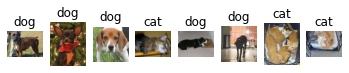

In [3]:
i = 0
fig, ax = plt.subplots(1, 8)
for image, label in train_data.take(8):
    ax[i].axis('off')
    ax[i].set_title(classes[label])
    ax[i].imshow(image)
    i += 1
 
plt.show()

## Preprocessing 

In [4]:
def preprocess(img, label, HEIGHT = 200, WIDTH = 200):
  return tf.image.resize(img, [HEIGHT, WIDTH]) / 255, label

In [5]:
train_data = train_data.map(preprocess).batch(32)
test_data = test_data.map(preprocess).batch(32)

## Model

In [6]:
input = Input((200, 200, 3))

conv1 = Conv2D(16, (3,3),  activation = 'relu')

x = conv1(input)
x = MaxPool2D((2,2)) (x)
x = Conv2D(32, (3,3), activation = 'relu') (x)
x = MaxPool2D((2,2)) (x)
x = Conv2D(64, (3,3), activation = 'relu') (x)
x = MaxPool2D((2,2)) (x)
x = Flatten() (x)
x = Dense(512, activation = 'relu') (x)

output = Dense(1, activation = 'sigmoid') (x)

model = Model(inputs = input, outputs = output, name = 'cats_vs_dogs')

In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [8]:
r = model.fit(train_data, epochs = 10, validation_data = test_data)

Epoch 1/10
509/509 [==============================] - 57s 92ms/step - loss: 0.6290 - accuracy: 0.6504 - val_loss: 0.5417 - val_accuracy: 0.7335
Epoch 2/10
509/509 [==============================] - 64s 126ms/step - loss: 0.5008 - accuracy: 0.7563 - val_loss: 0.4909 - val_accuracy: 0.7653
Epoch 3/10
509/509 [==============================] - 46s 90ms/step - loss: 0.4134 - accuracy: 0.8092 - val_loss: 0.4694 - val_accuracy: 0.7791
Epoch 4/10
509/509 [==============================] - 46s 91ms/step - loss: 0.2966 - accuracy: 0.8708 - val_loss: 0.5931 - val_accuracy: 0.7637
Epoch 5/10
509/509 [==============================] - 47s 91ms/step - loss: 0.2047 - accuracy: 0.9160 - val_loss: 0.6533 - val_accuracy: 0.7633
Epoch 6/10
509/509 [==============================] - 46s 90ms/step - loss: 0.1281 - accuracy: 0.9527 - val_loss: 0.8062 - val_accuracy: 0.7581
Epoch 7/10
509/509 [==============================] - 46s 90ms/step - loss: 0.0797 - accuracy: 0.9711 - val_loss: 0.9015 - val_accuracy

## After Model

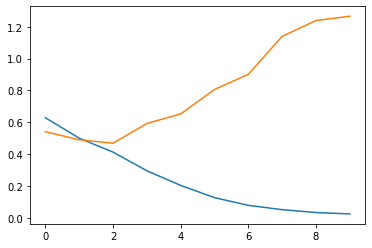

In [9]:
# Loss 
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

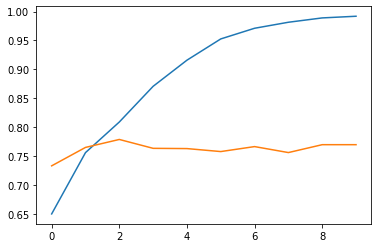

In [10]:
# Accuracy
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')

In [11]:
# Evaluate
model.evaluate(test_data) # 77% accuracy

219/219 [==============================] - 13s 58ms/step - loss: 1.2656 - accuracy: 0.7700


[1.2656316757202148, 0.7700243592262268]

In [12]:
# Predictions
preds = model.predict(test_data)

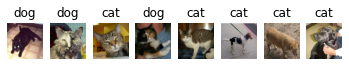

In [25]:
i = 0
fig, ax = plt.subplots(1, 8)
for image, _ in test_data.take(8):
    predictedLabel = int(preds[i] >= 0.5)
 
    ax[i].axis('off')
    ax[i].set_title(classes[predictedLabel])
    ax[i].imshow(image[0])
    i += 1
 
plt.show()

In [26]:
model.save("cats_vs_dogs")

INFO:tensorflow:Assets written to: cats_vs_dogs/assets


INFO:tensorflow:Assets written to: cats_vs_dogs/assets


In [27]:
new_model = tf.keras.models.load_model("cats_vs_dogs")

new_preds = new_model.predict(test_data)

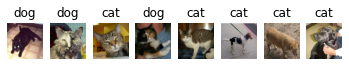

In [28]:
i = 0
fig, ax = plt.subplots(1, 8)
for image, _ in test_data.take(8):
    predictedLabel = int(preds[i] >= 0.5)
 
    ax[i].axis('off')
    ax[i].set_title(classes[predictedLabel])
    ax[i].imshow(image[0])
    i += 1
 
plt.show()